# Conclusions of Random Forests model applied to IMDB Movie Dataset to predict Average Rating

## Mean Absolute Error

We obtained a MAE of 0.26, pretty accurate considering a scale of 0-10 for IMBD rating.

## Features Importance

1. **Worldwide_Gross**: most important feature to predict movie IMBD rating (makes sense)
   
2. **Metascore**: second most important feature to predict movie IMDB rating (makes sense) 

3. **Budget**: least importante feature to predict movie IMBD rating (a bit surprising, perhaps the best rated movies not always had the greatest budgets)

## Real Values vs Predicted Values

The scatterplot shows that for lowest rating movies, our predictions for IMDB rating were more "optmistic". But as we move right on our x-axis (real values), we can see that our model can make better predictions. Finally, for higher ratings, our model becomes more "pessimistic", and also the accuracy decreases greatly.

## Error Distribution

Our graph shows that 80% of our values had an absolute error of 0.4 or less.

### Final comments

This model is simple but yet had a decent accuracy for predicting movies IMDB ratings based on the features ['Metascore','Budget','Worldwide_Gross'].

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\YX436MP\Downloads\archive (2)\IMDB_Movies_Dataset.csv")
df = df.set_index(df.columns[0])
df.index.name = 'Index' 

# Remove spaces from columns names
df.columns = df.columns.str.replace(' ', '_')

# Remover NaNs
df = df.dropna()

# Display the DataFrame
df

,Title,Average_Rating,Director,Writer,Metascore,Cast,Release_Date,Country_of_Origin,Languages,Budget,Worldwide_Gross,Runtime
Index,,,,,,,,,,,,
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
7,The Dark Knight,9.0,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer",84.0,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","July 18, 2008 (India)","United States, United Kingdom","English, Mandarin","$185,000,000 (estimated)","$1,009,053,678",2 hours 32 minutes
8,Schindler's List,9.0,Steven Spielberg,"Thomas Keneally, Steven Zaillian",95.0,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...","December 15, 1993 (India)",United States,"English, Hebrew, German, Polish, Latin","$22,000,000 (estimated)","$322,161,245",3 hours 15 minutes
9,12 Angry Men,9.0,Sidney Lumet,Reginald Rose,97.0,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","April 10, 1957 (United States)",United States,English,"$350,000 (estimated)","$2,945",1 hour 36 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...
465,Powaqqatsi,7.2,Godfrey Reggio,"Godfrey Reggio, Ken Richards",57.0,"Christie Brinkley, David Brinkley, Patrick Dis...","June 2, 1988 (West Germany)",United States,"Hopi, English, Spanish","$2,500,000 (estimated)","$592,592",1 hour 39 minutes
468,Irina Palm,7.2,Sam Garbarski,"Philippe Blasband, Martin Herron",55.0,"Marianne Faithfull, Predrag 'Miki' Manojlovic,...","April 18, 2007 (Belgium)","Belgium, Germany, Luxembourg, United Kingdom, ...",English,"$4,500,000 (estimated)","$10,610,835",1 hour 43 minutes
475,Chico & Rita,7.2,"Tono Errando, Javier Mariscal, Fernando Trueba","Ignacio Martínez de Pisón, Fernando Trueba",76.0,"Eman Xor Oña, Limara Meneses, Mario Guerra, Jo...","November 19, 2010 (United Kingdom)","Spain, United Kingdom, Isle of Man","Spanish, English, French","€9,200,000 (estimated)","$2,347,919",1 hour 34 minutes


In [28]:
df.columns

Index(['Title', 'Average_Rating', 'Director', 'Writer', 'Metascore', 'Cast',
       'Release_Date', 'Country_of_Origin', 'Languages', 'Budget',
       'Worldwide_Gross', 'Runtime'],
      dtype='object')

In [29]:
df_train = df

In [30]:
# extract numeric values
import re

# Clean and convert 'budget' column
def clean_convert(value):
    # Remove all non-numeric values
    clean_value = re.sub(r'[^0-9]', '', value)
    return clean_value

# Apply function to 'budget' column and convert values to numeric type
df_train['Budget'] = df_train['Budget'].apply(clean_convert)
df_train['Budget'] = pd.to_numeric(df_train['Budget'])

# Verify result
print(df_train['Budget'].head())



Index
0     25000000
2      6000000
7    185000000
8     22000000
9       350000
Name: Budget, dtype: int64


In [31]:
# Apply function to 'Worldwide_Gross' column and convert values to numeric type 
df_train['Worldwide_Gross'] = df_train['Worldwide_Gross'].apply(clean_convert)
df_train['Worldwide_Gross'] = pd.to_numeric(df_train['Worldwide_Gross'])

# Verify result
print(df_train['Worldwide_Gross'].head())

Index
0      29332133
2     250342198
7    1009053678
8     322161245
9          2945
Name: Worldwide_Gross, dtype: int64


In [32]:
# Choose target and features
y = df_train.Average_Rating
features = ['Metascore','Budget','Worldwide_Gross']
X = df_train[features]


In [33]:
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [34]:
X_train

,Metascore,Budget,Worldwide_Gross
Index,,,
32,78.0,2500000,6568101
306,90.0,500000,4410
54,83.0,3800000,23701317
324,82.0,25000000,82468097
27,71.0,250000,12021272
...,...,...,...
131,80.0,23000000,149660003
185,75.0,3500000,24949050
364,64.0,80000000,350865342


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Apply random forests model
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

movie_preds = forest_model.predict(X_valid)
print(mean_absolute_error(y_valid, movie_preds))

0.2646606217616581


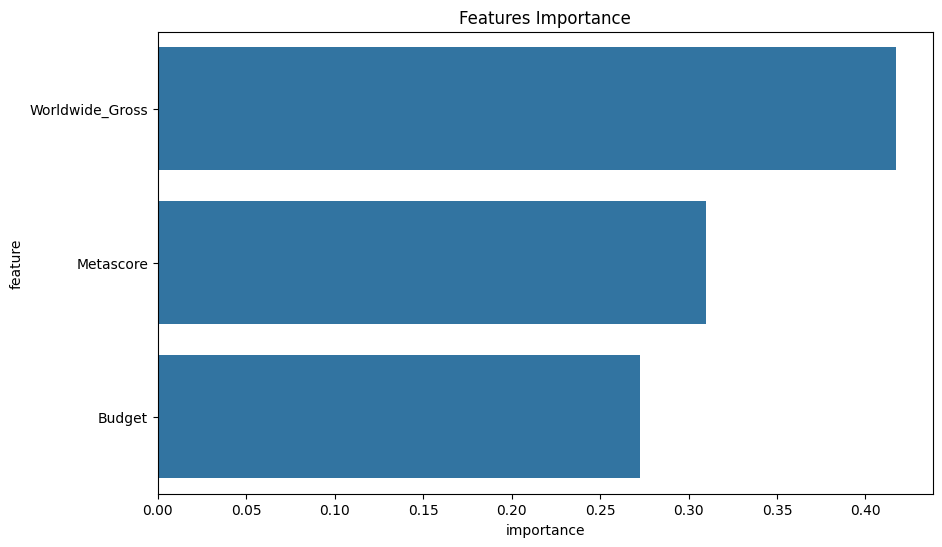

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Measuring Features importance
# Defining importances.
importances = forest_model.feature_importances_

# Creating a dataframe with importances
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plotting importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Features Importance')
plt.show()


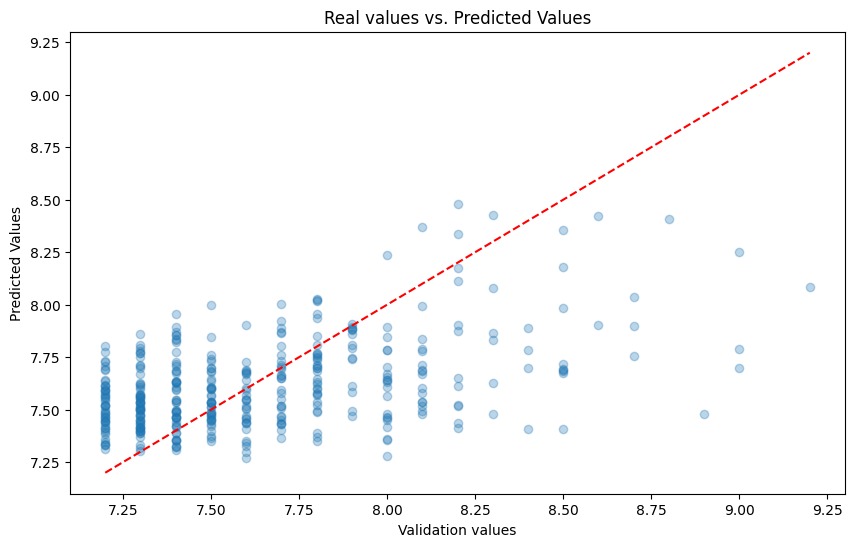

In [37]:
# Scatterplot of predicted values vs validation values
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, movie_preds, alpha=0.3)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')  # Reference line
plt.xlabel('Validation values')
plt.ylabel('Predicted Values')
plt.title('Real values vs. Predicted Values')
plt.show()

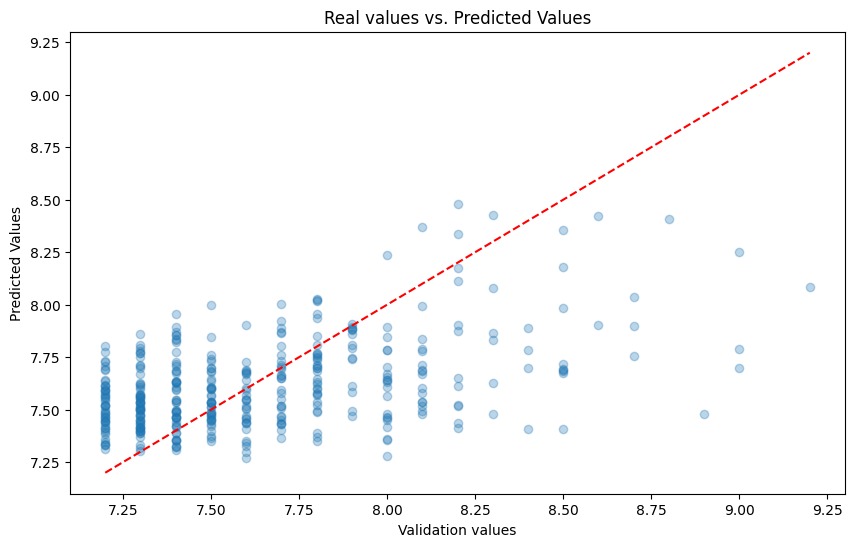

In [38]:
# Scatterplot of predicted values vs validation values
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, movie_preds, alpha=0.3)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')  # Reference line
plt.xlabel('Validation values')
plt.ylabel('Predicted Values')
plt.title('Real values vs. Predicted Values')
plt.show()

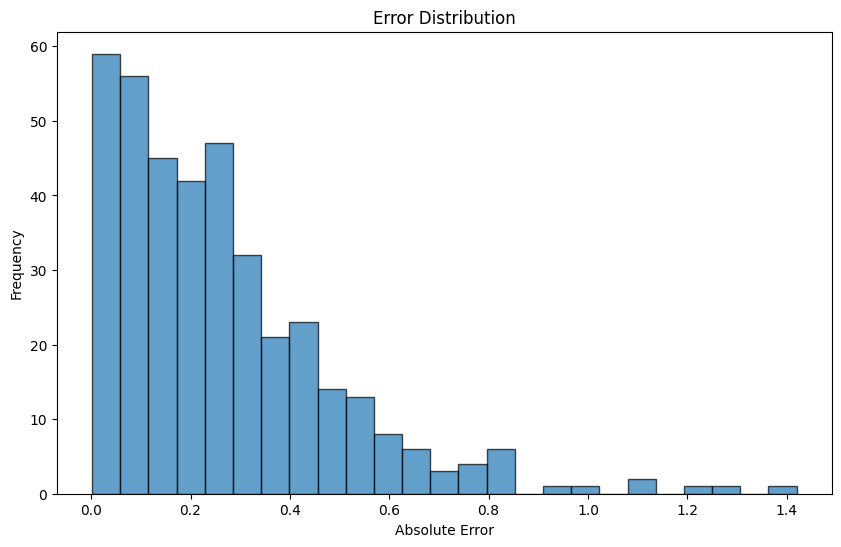

In [39]:
# Error distribution
y_pred = movie_preds.copy()
y_test = y_valid.copy()
errors = abs(y_pred - y_test)

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25, edgecolor='k', alpha=0.7)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()


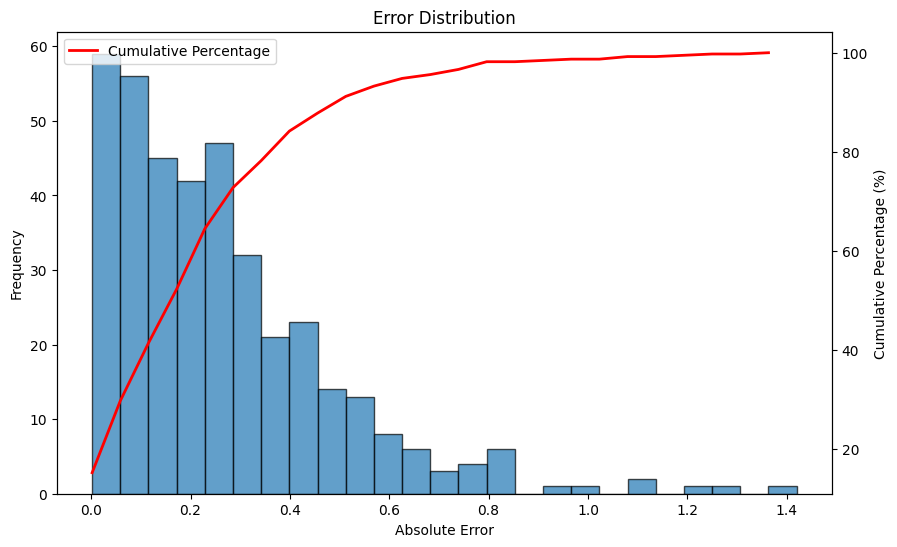

In [40]:
# Error distribution

import numpy as np
import matplotlib.pyplot as plt

y_pred = movie_preds.copy()
y_test = y_valid.copy()

# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the histogram of errors
counts, bins, patches = ax1.hist(errors, bins=25, edgecolor='k', alpha=0.7)
ax1.set_xlabel('Absolute Error')
ax1.set_ylabel('Frequency')
ax1.set_title('Error Distribution')

# Set up the secondary y-axis
ax2 = ax1.twinx()

# Calculate the cumulative percentage of frequency
cum_counts = np.cumsum(counts)
cum_perc = cum_counts / cum_counts[-1] * 100

# Plot the red line for cumulative percentage
ax2.plot(bins[:-1], cum_perc, 'r-', linewidth=2, label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.legend(loc='upper left')

# Display the plot
plt.show()
